In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
url = "https://books.toscrape.com/"
respose = requests.get(url)

In [ ]:
soup = BeautifulSoup(respose.text,'html.parser')

In [ ]:
soup.select('article.product_pod')

[<article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">Â£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="th

In [ ]:
#lista com vinte livros
len(soup.select('article.product_pod'))

20

In [ ]:
soup.select('article.product_pod')[0]

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">Â£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [ ]:
soup.select('article.product_pod')[0].h3.a['title']

'A Light in the Attic'

In [ ]:
soup.select('article.product_pod')[0].select_one('p.price_color').text

'Â£51.77'

In [ ]:
#pegar se tem em estoque
soup.select('article.product_pod')[0].select_one('p.instock.availability').text.strip()

'In stock'

In [ ]:
star = soup.select('article.product_pod')[0].select_one('p.star-rating')

In [ ]:
star.get('class')[1]

'Three'

In [ ]:
def traduzir_numero(numero_em_ingles):
  #usando dicionario para traduzir os numeros
  traducao = {
      "one" : "um",
      "two" : "dois",
      "three" : "tres",
      "four" : "quatro",
      "five" : "cinco"
  }

  #retorna a traducao ou uma mensagem caso o numero nao esteja no dicionario
  return traducao.get(numero_em_ingles.lower(), "Número não encontrado")

In [ ]:
traduzir_numero(star.get('class')[1].lower())

'tres'

In [ ]:
url = "https://books.toscrape.com/"
respose = requests.get(url)

In [ ]:
ls_titulo = []
ls_preco = []
ls_estoque = []
ls_nota = []
for book in soup.select('article.product_pod'):
  ls_titulo.append(book.h3.a['title'])
  ls_preco.append(book.select_one('p.price_color').text)
  ls_estoque.append(book.select_one('p.instock.availability').text.strip())
  star = book.select_one('p.star-rating')
  ls_nota.append(traduzir_numero(star.get('class')[1].lower()))
  pagina = pd.DataFrame({
      'Titulo': ls_titulo,
      'Preço': ls_preco,
      'Estoque' : ls_nota
  })

In [ ]:
pagina.to_excel('Book.xlsx')

In [ ]:
# URL base para navegação
url_base = 'https://books.toscrape.com/catalogue/'

# Listas para armazenar os dados
ls_titulo = []
ls_preco = []
ls_estoque = []
ls_nota = []

# Loop para percorrer todas as páginas
pagina_atual = 1
while True:
    # URL da página atual
    url = f'{url_base}page-{pagina_atual}.html'
    response = requests.get(url)

    # Verifica se a página existe
    if response.status_code != 200:
        print(f"Fim das páginas na página {pagina_atual}.")
        break

    # Faz a raspagem dos dados
    soup = BeautifulSoup(response.text, 'html.parser')
    for book in soup.select('article.product_pod'):
        ls_titulo.append(book.h3.a['title'])
        ls_preco.append(book.select_one('p.price_color').text)
        ls_estoque.append(book.select_one('p.instock.availability').text.strip())

        # Pegar a nota (estrelas)
        star = book.select_one('p.star-rating')
        ls_nota.append(traduzir_numero(star.get('class')[1].lower()))

    print(f"Página {pagina_atual} raspada.")
    pagina_atual += 1

# Criar o DataFrame com os dados coletados
pagina = pd.DataFrame({
    'Titulo': ls_titulo,
    'Preço': ls_preco,
    'Estoque': ls_estoque,
    'Nota': ls_nota
})

# Exibir os primeiros registros
print(pagina.head())

Página 1 raspada.
Página 2 raspada.
Página 3 raspada.
Página 4 raspada.
Página 5 raspada.
Página 6 raspada.
Página 7 raspada.
Página 8 raspada.
Página 9 raspada.
Página 10 raspada.
Página 11 raspada.
Página 12 raspada.
Página 13 raspada.
Página 14 raspada.
Página 15 raspada.
Página 16 raspada.
Página 17 raspada.
Página 18 raspada.
Página 19 raspada.
Página 20 raspada.
Página 21 raspada.
Página 22 raspada.
Página 23 raspada.
Página 24 raspada.
Página 25 raspada.
Página 26 raspada.
Página 27 raspada.
Página 28 raspada.
Página 29 raspada.
Página 30 raspada.
Página 31 raspada.
Página 32 raspada.
Página 33 raspada.
Página 34 raspada.
Página 35 raspada.
Página 36 raspada.
Página 37 raspada.
Página 38 raspada.
Página 39 raspada.
Página 40 raspada.
Página 41 raspada.
Página 42 raspada.
Página 43 raspada.
Página 44 raspada.
Página 45 raspada.
Página 46 raspada.
Página 47 raspada.
Página 48 raspada.
Página 49 raspada.
Página 50 raspada.
Fim das páginas na página 51.
                             

In [ ]:
pagina

,Titulo,Preço,Estoque,Nota
0,A Light in the Attic,Â£51.77,In stock,tres
1,Tipping the Velvet,Â£53.74,In stock,um
2,Soumission,Â£50.10,In stock,um
3,Sharp Objects,Â£47.82,In stock,quatro
4,Sapiens: A Brief History of Humankind,Â£54.23,In stock,cinco
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Â£55.53,In stock,um
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Â£57.06,In stock,quatro
997,A Spy's Devotion (The Regency Spies of London #1),Â£16.97,In stock,cinco
998,1st to Die (Women's Murder Club #1),Â£53.98,In stock,um


In [ ]:
#analise de dados em cima dele
df = pd.read_excel('/content/Book.xlsx')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Limpeza de dados
# 1. Converter a coluna "Preço" de string para float
df['Preço'] = df['Preço'].replace('[£]', '', regex=True).replace('[Â]', '', regex=True).astype(float)

# 2. Converter a coluna "Nota" de texto para valores numéricos
nota_mapa = {'um': 1, 'dois': 2, 'tres': 3, 'quatro': 4, 'cinco': 5}
df['Nota'] = df['Nota'].map(nota_mapa)

In [ ]:
df

,Unnamed: 0,Titulo,Preço,Estoque,Nota
0,0,A Light in the Attic,51.77,In stock,3
1,1,Tipping the Velvet,53.74,In stock,1
2,2,Soumission,50.10,In stock,1
3,3,Sharp Objects,47.82,In stock,4
4,4,Sapiens: A Brief History of Humankind,54.23,In stock,5
...,...,...,...,...,...
995,995,Alice in Wonderland (Alice's Adventures in Won...,55.53,In stock,1
996,996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,In stock,4
997,997,A Spy's Devotion (The Regency Spies of London #1),16.97,In stock,5
998,998,1st to Die (Women's Murder Club #1),53.98,In stock,1


In [ ]:
media_preco = df['Preço'].mean()
mediana_preco = df['Preço'].median()
desvio_padrao = df['Preço'].std()

media_preco_por_nota = df.groupby('Nota')['Preço'].mean()

print(f"A média dos preços: {media_preco:.2f}")
print(f"A mediana dos preços: {mediana_preco:.2f}")
print(f"O desvio padrao é: {desvio_padrao:.2f}")
print("\nPreço medio por nota:")
print(media_preco_por_nota)

A média dos preços: 35.07
A mediana dos preços: 35.98
O desvio padrao é: 14.45

Preço medio por nota:
Nota
1    34.561195
2    34.810918
3    34.692020
4    36.093296
5    35.374490
Name: Preço, dtype: float64


/tmp/ipython-input-2054282168.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Nota',y='Preço',data=df, palette ='Blues')


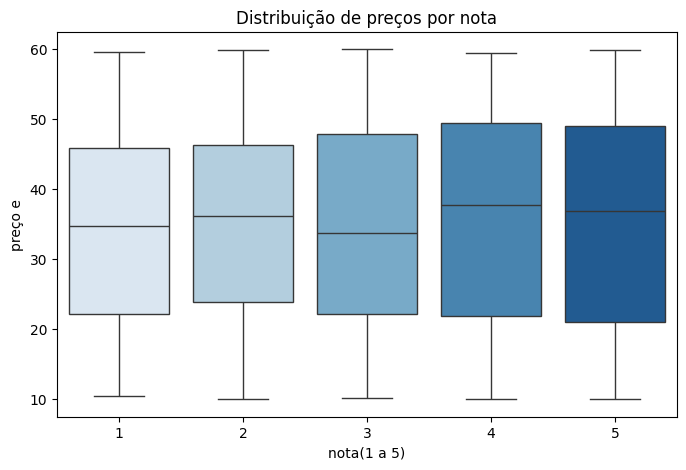

In [ ]:
#VIZUALIZAÇÃO 1: RELAÇÃO ENYTRTE NOTAS E PREÇOS
plt.figure(figsize=(8,5))
sns.boxplot(x='Nota',y='Preço',data=df, palette ='Blues')
plt.title('Distribuição de preços por nota')
plt.xlabel('nota(1 a 5)')
plt.ylabel('preço e')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Titulo      1000 non-null   object 
 2   Preço       1000 non-null   float64
 3   Estoque     1000 non-null   object 
 4   Nota        1000 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB
